OCR NORMAL IMAGE

In [14]:
# import library
import cv2
from matplotlib import pyplot as plt
import pytesseract 
import numpy as np
pytesseract.pytesseract.tesseract_cmd=r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

In [229]:
# import image for ocr
img = cv2.imread("../resources/image/ocr.JPG")

In [2]:
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

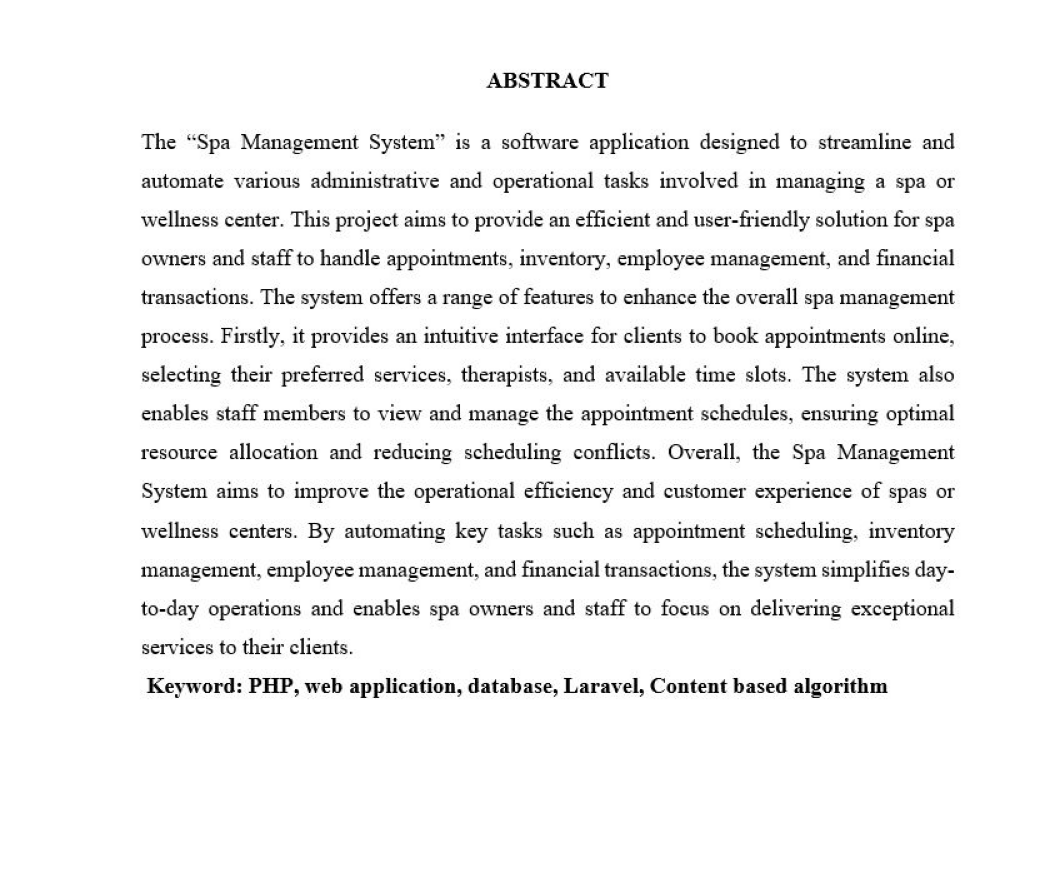

In [231]:
display("../resources/image/ocr.JPG")

In [232]:
# Apply OCR
text =pytesseract.image_to_string(img)

In [233]:
# Output of OCR
print(text)

ABSTRACT

The “Spa Management System” is a software application designed to streamline and
automate various administrative and operational tasks involved in managing a spa or
wellness center. This project aims to provide an efficient and user-friendly solution for spa
owners and staff to handle appointments, inventory, employee management, and financial
transactions. The system offers a range of features to enhance the overall spa management
process. Firstly, it provides an intuitive interface for clients to book appointments online,
selecting their preferred services, therapists, and available time slots. The system also
enables staff members to view and manage the appointment schedules, ensuring optimal
resource allocation and reducing scheduling conflicts. Overall, the Spa Management
System aims to improve the operational efficiency and customer experience of spas or
wellness centers. By automating key tasks such as appointment scheduling, inventory
management, employee management, 

OCR SKEW IMAGE

In [234]:
# load skew-image
skew_img = cv2.imread("../resources/image/ocr3.jpg")

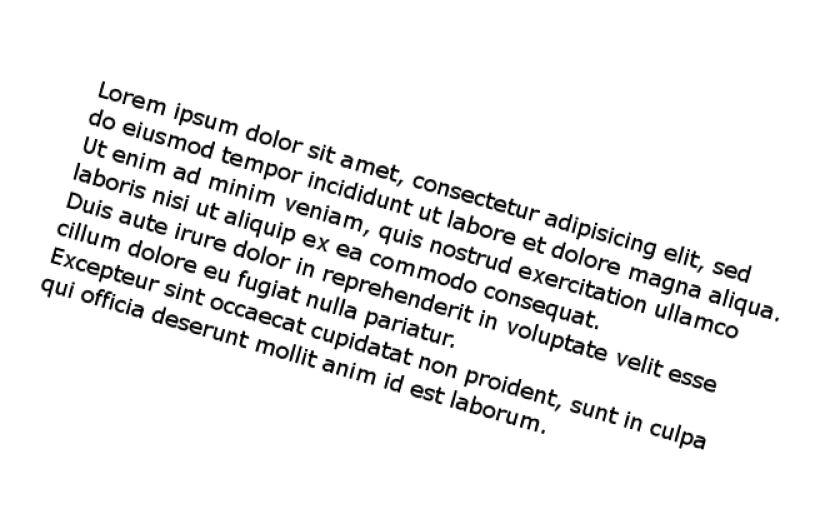

In [235]:
display("../resources/image/ocr3.jpg")

In [243]:
import numpy as np
# find Angle of skew-image
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("../resources/image/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [244]:
# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [245]:
fixed = deskew(skew_img)
cv2.imwrite("../resources/image/deskew_img.jpg", fixed)

1


True

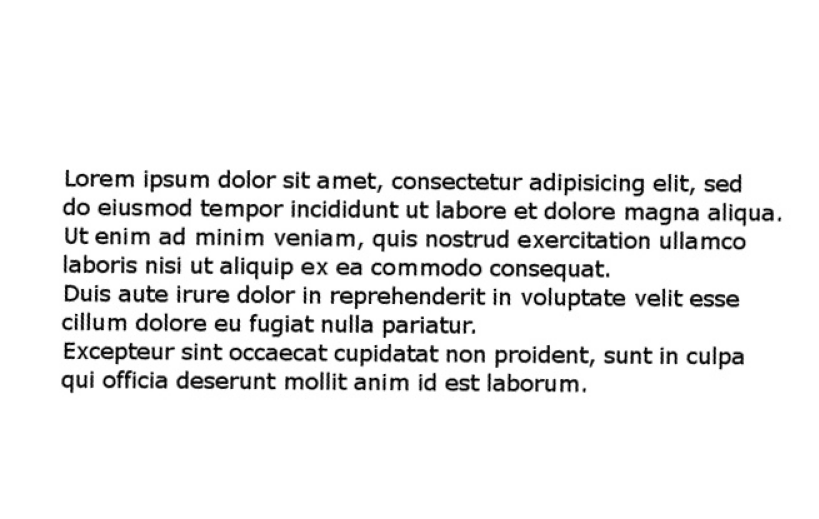

In [246]:
# show deskw image
display("../resources/image/deskew_img.jpg")

In [6]:
deskew_img = cv2.imread("../resources/image/deskew_img.jpg")

In [7]:
deskew_text=pytesseract.image_to_string(deskew_img)

In [242]:
print(deskew_text)

Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed

do eiusmod tempor incididunt ut labore et dolore magna aliqua.
Ut enim ad minim veniam, quis nostrud exercitation ullamco
laboris nisi ut aliquip ex ea commodo consequat.

Duis aute irure dolor in reprehenderit in voluptate velit esse
cillum dolore eu fugiat nulla pariatur.

Excepteur sint occaecat cupidatat non proident, sunt in culpa
qui officia deserunt mollit anim id est laborum.



License OCR using pytesseract

In [70]:
license_img =cv2.imread("../resources/image/license2.jpg")

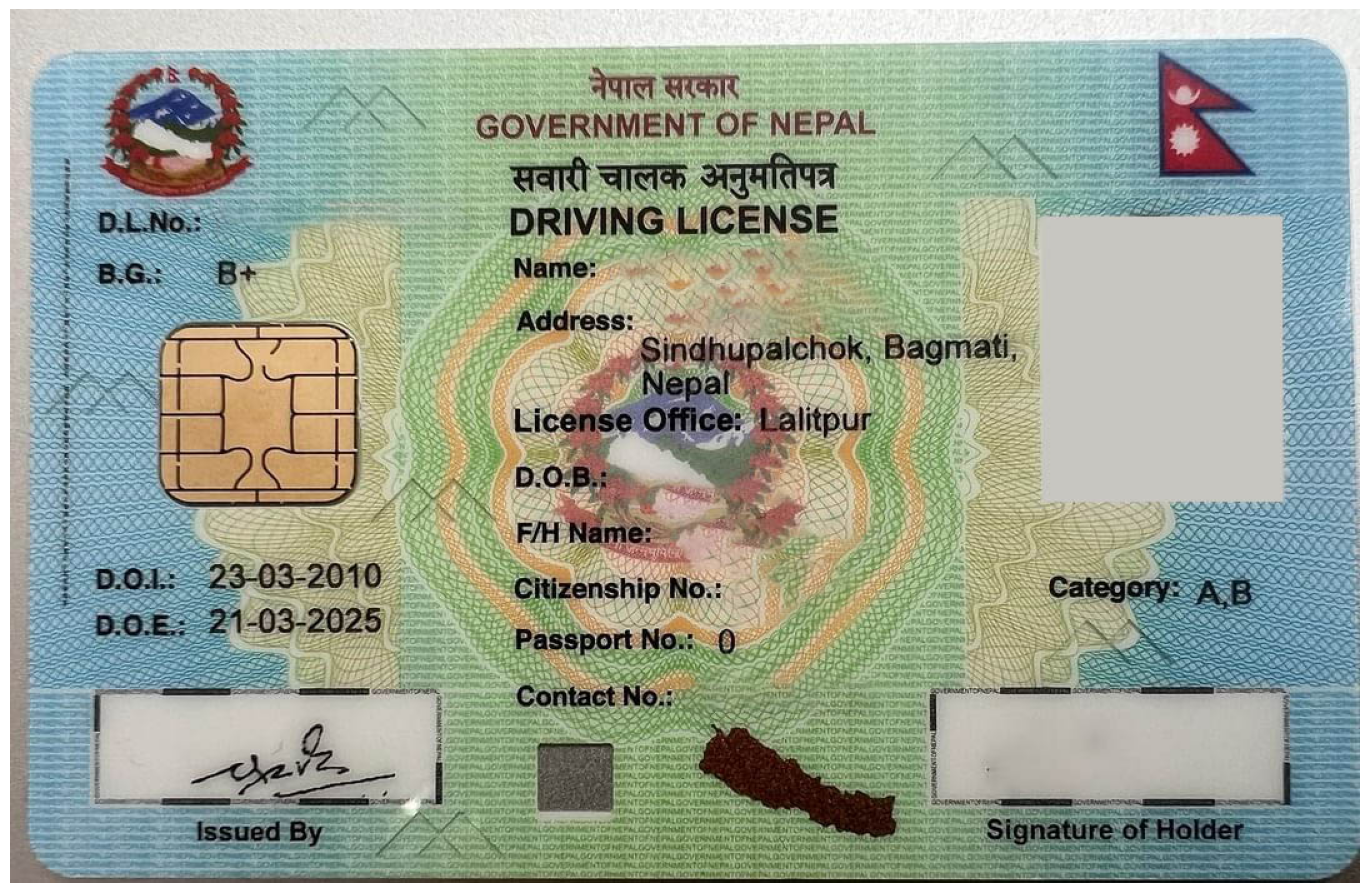

In [71]:
display("../resources/image/license2.jpg")

In [109]:
def imgshow(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

grayscale and binarization

In [102]:
gray = cv2.cvtColor(license_img, cv2.COLOR_BGR2GRAY)
# ret,thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 40)

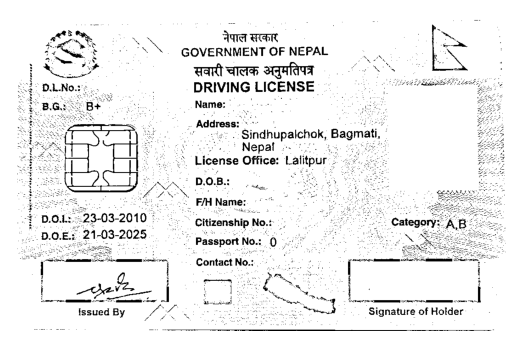

In [110]:
imgshow(thresh)

noise remove

In [89]:
def noise_removal(image):
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [90]:
no_noise = noise_removal(thresh)

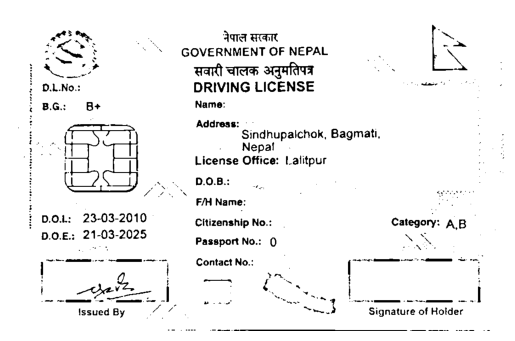

In [111]:
imgshow(no_noise)

Dialation to thicken border

In [92]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,1),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [107]:
dilate_image = thick_font(no_noise)

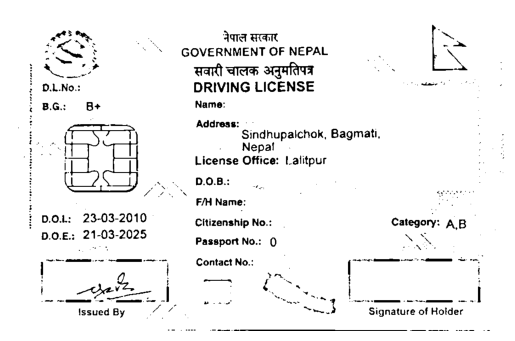

In [112]:
imgshow(dilate_image)

Use pytesseract

In [95]:
license_text =pytesseract.image_to_string(dilate_image)

In [96]:
print(license_text)

ao _ Jara ware ~

a or 7
MQ i ‘GOVERNMENT OF NEPAL ; XY
i SL? wart ares aeqAATa os
i D.L.No.: DRIVING LICENSE amas
i BG: B+ Name:
Address:
Sindhupaichok, Bagmati,
Nepal
License Office: Lalitpur
wav (0.0.8.
i oS F/H Name: : :
$ D.O4: 23-03-2010 i ;
: Citizenship No.: Category: A.B
D.O.E.: 21-03-2025 Passport No.: 0 x X
mm ee rane Contact No.: To ton
H — a '
i hele aa * i |

{ssued By | an —— 3 "signature of Holder



Easy OCR

In [15]:
import easyocr

In [16]:
img_path='../resources/image/license5.jpg'

easyocr use

In [17]:
reader = easyocr.Reader(['en'])
result = reader.readtext(img_path)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [18]:
result[4]

([[257, 87], [520, 87], [520, 114], [257, 114]],
 'Name: TEK NATH BHANDARI',
 0.8338600817832529)

select the detected text

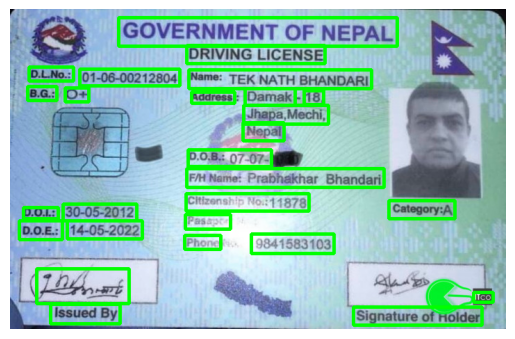

In [19]:
img = cv2.imread(img_path)
spacer = 100
font = cv2.FONT_HERSHEY_SIMPLEX
for detection in result: 
    top_left = tuple(map(int, detection[0][0]))
    bottom_right = tuple(map(int, detection[0][2]))
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    spacer+=15
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
easy_text =[]
for detection in result:
    text = detection[1]
    easy_text.append(text)

In [21]:
easy_text

['GOVERNMENT OF NEPAL',
 'DRIVING LICENSE',
 'DLNo::',
 '01-06-00212804',
 'Name: TEK NATH BHANDARI',
 'B.G::',
 '0+',
 'Address',
 'Damak',
 '18,',
 'Jhapa,Mechi;',
 'Nepal',
 'D.O.8:: 07-07-',
 'FMH Name: Prabhakhar  Bhandari',
 'Cltizenship Wo :11878',
 'D.O:',
 '30-05-2012',
 'Category:A',
 'Pas_pca',
 'D.OE:',
 '14-05-2022',
 'Phona',
 '9841583103',
 '10#',
 'Itco',
 'Issued By',
 'Signature of Holder']